In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\df_visualized.csv")

# Assuming 'Label' is the column containing class labels
X = df.drop(columns=[' Label'])
y = df[' Label']

# Encode class labels if they are not already encoded
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate the number of samples in the minority class
minority_class_label = 12  # Replace with the actual label of the minority class
num_minority_samples = sum(y_train == minority_class_label)

# Set 'k_neighbors' to a value less than or equal to the number of minority class samples
k_neighbors = min(5, num_minority_samples)

# Check if k_neighbors is greater than or equal to the number of minority samples
if k_neighbors >= num_minority_samples:
    # If so, set k_neighbors to num_minority_samples - 1
    k_neighbors = num_minority_samples - 1

# Apply SMOTE to balance the class distribution in the training data
smote = SMOTE(sampling_strategy='auto', k_neighbors=k_neighbors, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create and train the Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Decode the predicted class labels if needed
y_pred = label_encoder.inverse_transform(y_pred)

# Generate classification report
print("Classification Report:")
print(classification_report(label_encoder.inverse_transform(y_test), y_pred))


Classification Report:


C:\conda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\conda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4512
           1       0.82      0.52      0.64     11195
           2       0.47      0.70      0.57     11661
           3       0.48      0.08      0.13     11745
           4       0.73      0.91      0.81     11343
           5       0.97      0.99      0.98      8247
           6       1.00      1.00      1.00     11940
           7       0.63      0.90      0.74     11883
           8       0.94      0.44      0.60     10868
           9       0.63      0.97      0.77     10779
          10       0.57      0.78      0.66     11756
          11       0.65      0.43      0.52     11970
          12       0.00      0.00      0.00         1

    accuracy                           0.70    127900
   macro avg       0.68      0.67      0.65    127900
weighted avg       0.72      0.70      0.68    127900



C:\conda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


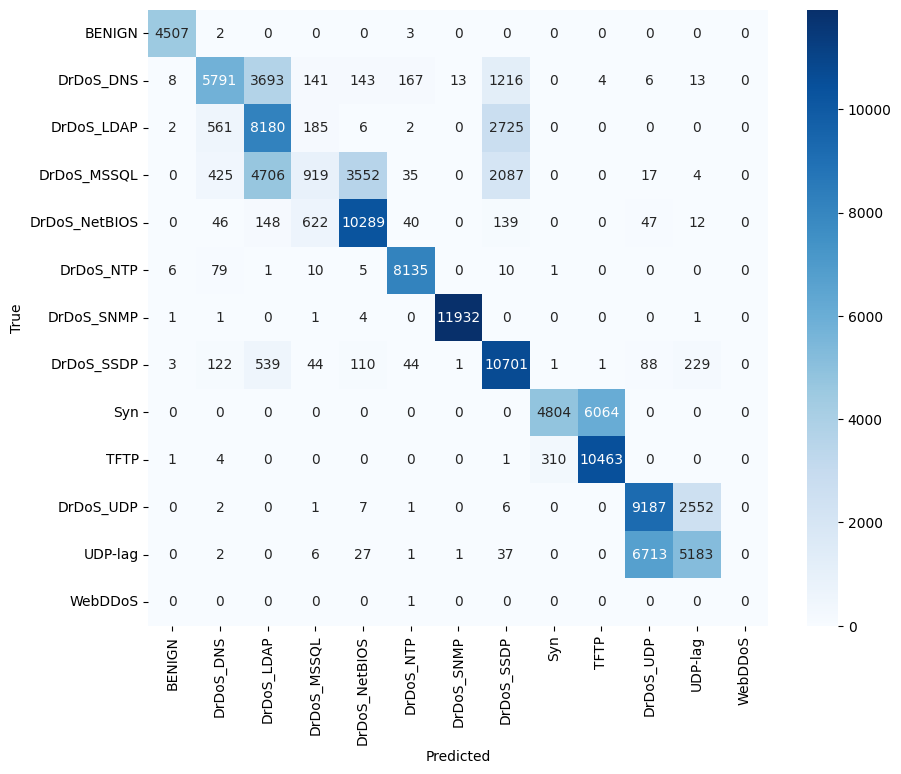

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define class names corresponding to the labels
class_names = [
    'BENIGN', 'DrDoS_DNS', 'DrDoS_LDAP', 'DrDoS_MSSQL',
    'DrDoS_NetBIOS', 'DrDoS_NTP', 'DrDoS_SNMP', 'DrDoS_SSDP',
    'Syn', 'TFTP', 'DrDoS_UDP', 'UDP-lag', 'WebDDoS'
]

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\df_visualized.csv")

# Separate features and labels
X = data.drop([' Label'], axis=1)
y = data[' Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report for more detailed metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.75
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4512
           1       0.81      0.55      0.65     11195
           2       0.50      0.72      0.59     11661
           3       0.67      0.37      0.47     11745
           4       0.91      0.83      0.87     11343
           5       0.97      0.97      0.97      8247
           6       1.00      1.00      1.00     11940
           7       0.65      0.90      0.75     11883
           8       0.92      0.45      0.60     10868
           9       0.63      0.96      0.76     10779
          10       0.68      0.80      0.74     11756
          11       0.75      0.63      0.69     11970
          12       0.00      0.00      0.00         1

    accuracy                           0.75    127900
   macro avg       0.73      0.71      0.70    127900
weighted avg       0.77      0.75      0.74    127900



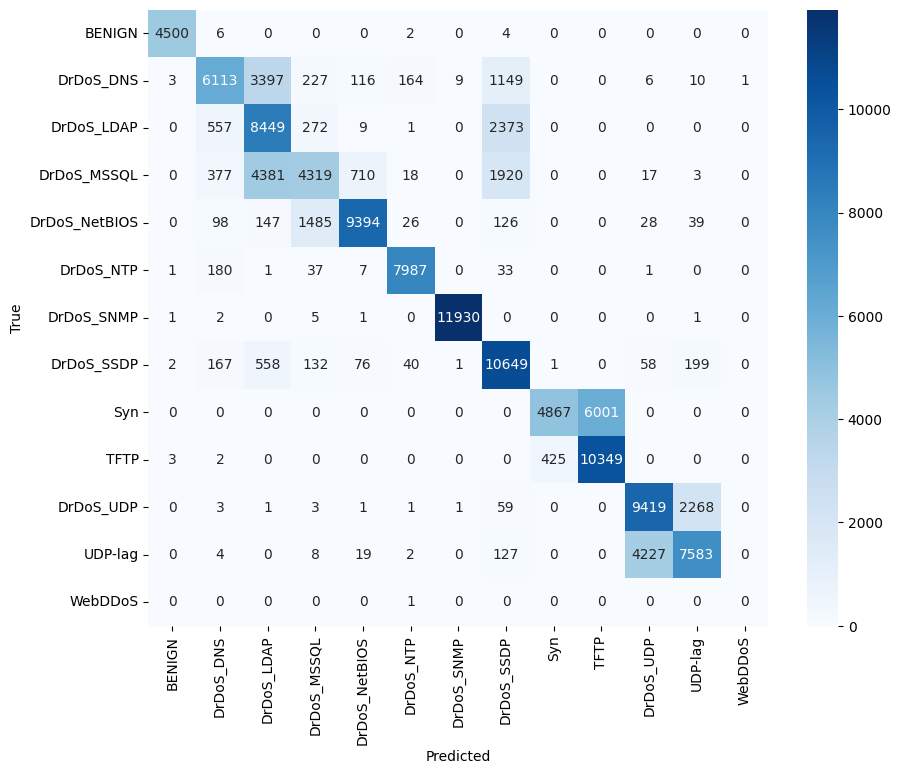

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define class names corresponding to the labels
class_names = [
    'BENIGN', 'DrDoS_DNS', 'DrDoS_LDAP', 'DrDoS_MSSQL',
    'DrDoS_NetBIOS', 'DrDoS_NTP', 'DrDoS_SNMP', 'DrDoS_SSDP',
    'Syn', 'TFTP', 'DrDoS_UDP', 'UDP-lag', 'WebDDoS'
]

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Define class names corresponding to the labels
class_names = [
    'BENIGN', 'DrDoS_DNS', 'DrDoS_LDAP', 'DrDoS_MSSQL',
    'DrDoS_NetBIOS', 'DrDoS_NTP', 'DrDoS_SNMP', 'DrDoS_SSDP',
    'Syn', 'TFTP', 'DrDoS_UDP', 'UDP-lag', 'WebDDoS'
]

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a printable confusion matrix table
confusion_matrix_str = "Predicted\t" + "\t".join(class_names) + "\n"
for i, row in enumerate(cm):
    confusion_matrix_str += class_names[i] + "\t" + "\t".join(map(str, row)) + "\n"

# Print the confusion matrix
print(confusion_matrix_str)


Predicted	BENIGN	DrDoS_DNS	DrDoS_LDAP	DrDoS_MSSQL	DrDoS_NetBIOS	DrDoS_NTP	DrDoS_SNMP	DrDoS_SSDP	Syn	TFTP	DrDoS_UDP	UDP-lag	WebDDoS
BENIGN	4500	6	0	0	0	2	0	4	0	0	0	0	0
DrDoS_DNS	3	6113	3397	227	116	164	9	1149	0	0	6	10	1
DrDoS_LDAP	0	557	8449	272	9	1	0	2373	0	0	0	0	0
DrDoS_MSSQL	0	377	4381	4319	710	18	0	1920	0	0	17	3	0
DrDoS_NetBIOS	0	98	147	1485	9394	26	0	126	0	0	28	39	0
DrDoS_NTP	1	180	1	37	7	7987	0	33	0	0	1	0	0
DrDoS_SNMP	1	2	0	5	1	0	11930	0	0	0	0	1	0
DrDoS_SSDP	2	167	558	132	76	40	1	10649	1	0	58	199	0
Syn	0	0	0	0	0	0	0	0	4867	6001	0	0	0
TFTP	3	2	0	0	0	0	0	0	425	10349	0	0	0
DrDoS_UDP	0	3	1	3	1	1	1	59	0	0	9419	2268	0
UDP-lag	0	4	0	8	19	2	0	127	0	0	4227	7583	0
WebDDoS	0	0	0	0	0	1	0	0	0	0	0	0	0



In [6]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load preprocessed dataset
data = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\df_visualized.csv")

# Separate features and labels
X = data.drop(' Label', axis=1)
y = data[' Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set hyperparameters for the LightGBM model
params = {
    'objective': 'multiclass',
    'num_class': 13,  # (0 to 12)
    'boosting_type': 'gbdt',
    'metric': 'multi_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the LightGBM model
num_round = 100  # You can adjust this based on the training performance
bst = lgb.train(params, train_data, num_round)

# Make predictions on the test set
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Convert the predicted probabilities into class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_labels)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report for more detailed metrics
print(classification_report(y_test, y_pred_labels))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4512
           1       0.88      0.55      0.68     11195
           2       0.50      0.74      0.59     11661
           3       0.69      0.35      0.47     11745
           4       0.90      0.83      0.86     11343
           5       0.96      0.95      0.96      82

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define class names corresponding to the labels
class_names = [
    'BENIGN', 'DrDoS_DNS', 'DrDoS_LDAP', 'DrDoS_MSSQL',
    'DrDoS_NetBIOS', 'DrDoS_NTP', 'DrDoS_SNMP', 'DrDoS_SSDP',
    'Syn', 'TFTP', 'DrDoS_UDP', 'UDP-lag', 'WebDDoS'
]

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets